In [ ]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the Dataset

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()  # Use this to upload your dataset to Colab

# Read the dataset
loan_data = pd.read_csv('loan_data.csv')  # Replace with your actual file name
loan_data.head()  # Check the first few rows


Data Exploration

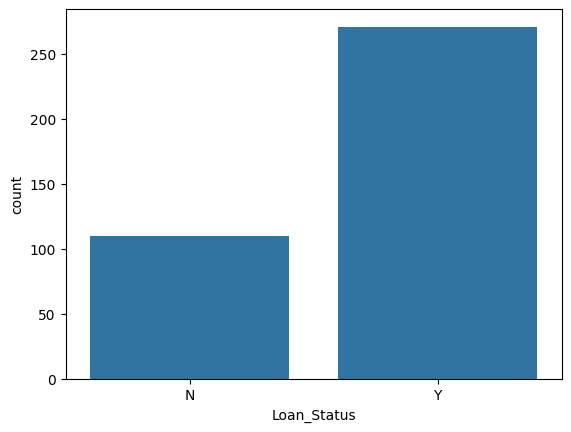

In [ ]:
# Check for missing values
loan_data.isnull().sum()

# Get summary statistics
loan_data.describe()

# Visualize the distribution of Loan Status
sns.countplot(x='Loan_Status', data=loan_data)
plt.show()

# Select only numerical columns for correlation heatmap
numeric_data = loan_data.select_dtypes(include=[np.number])






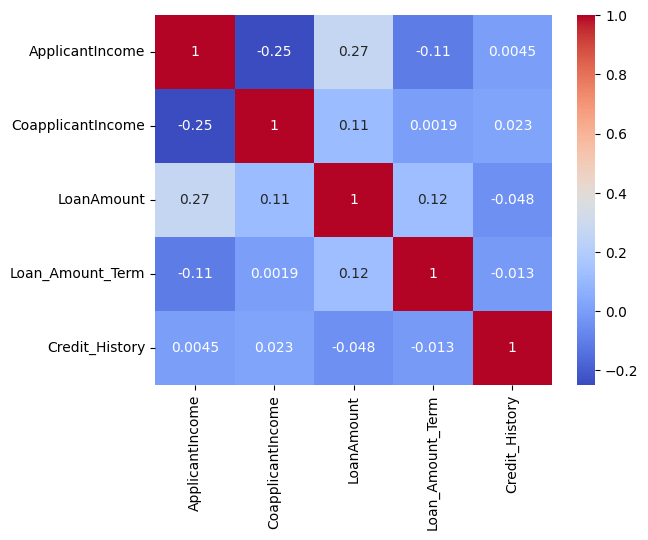

In [ ]:
# Correlation heatmap for numerical features
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing

In [ ]:
# Handle missing values by filling with median (or other techniques)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].median(), inplace=True)

# Convert categorical variables using LabelEncoder
le = LabelEncoder()
loan_data['Gender'] = le.fit_transform(loan_data['Gender'].astype(str))
loan_data['Married'] = le.fit_transform(loan_data['Married'].astype(str))
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'].astype(str))
loan_data['Property_Area'] = le.fit_transform(loan_data['Property_Area'])
loan_data['Loan_Status'] = le.fit_transform(loan_data['Loan_Status'])

# Check the processed data
loan_data.head()


<ipython-input-6-68598d8af4b6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
<ipython-input-6-68598d8af4b6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


Splitting the Data

In [ ]:
# Replace '3+' with 3 in the 'Dependents' column
loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 3)

# Handle any missing values in 'Dependents' by filling with 0 (or median)
loan_data['Dependents'].fillna(0, inplace=True)

# Convert 'Dependents' to integer
loan_data['Dependents'] = loan_data['Dependents'].astype(int)

# Check the unique values to confirm conversion
print(loan_data['Dependents'].unique())


# Convert categorical variables into numeric using LabelEncoder or OneHotEncoder
le = LabelEncoder()
loan_data['Gender'] = le.fit_transform(loan_data['Gender'].astype(str))
loan_data['Married'] = le.fit_transform(loan_data['Married'].astype(str))
loan_data['Education'] = le.fit_transform(loan_data['Education'])
loan_data['Self_Employed'] = le.fit_transform(loan_data['Self_Employed'].astype(str))
loan_data['Property_Area'] = le.fit_transform(loan_data['Property_Area'])

# Define features (X) and target variable (y)
X = loan_data.drop(columns=['Loan_Status', 'Loan_ID'])  # Features
y = loan_data['Loan_Status']  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of the scaled data
X_train.shape, X_test.shape


[1 0 2 3]


<ipython-input-7-f165ad9a018f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Dependents'].fillna(0, inplace=True)


((304, 11), (77, 11))

Building the Model

In [ ]:
# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1]


Model Evaluation

Accuracy: 79.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.33      0.47        21
           1       0.79      0.96      0.87        56

    accuracy                           0.79        77
   macro avg       0.79      0.65      0.67        77
weighted avg       0.79      0.79      0.76        77



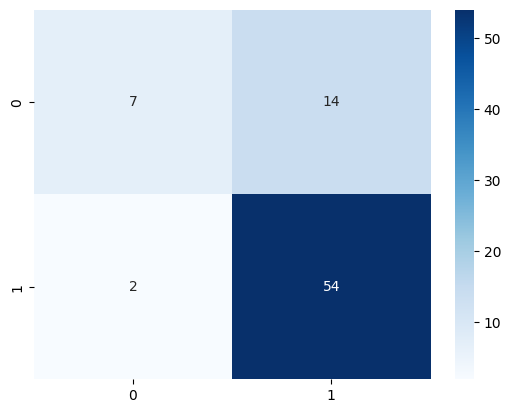

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
import joblib

# Save the trained Random Forest model and scaler
joblib.dump(model, 'loan_status_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Download the saved model and scaler files
from google.colab import files
files.download('loan_status_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save the scaler in Colab after training
joblib.dump(scaler, 'scaler.pkl')

# Download the scaler
from google.colab import files
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2


In [ ]:
import joblib

# Re-train your model here
# Save the trained model
joblib.dump(model, 'loan_status_model.pkl')

# Save the scaler as well
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train your RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Save the model to a file
with open('scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assume X_train and y_train are your training data and labels
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Save the trained model and scaler
joblib.dump(model, '/content/loan_status_model.pkl')
joblib.dump(scaler, '/content/scaler.pkl')

# Download the saved model and scaler files
from google.colab import files
files.download('/content/loan_status_model.pkl')
files.download('/content/scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>